<a href="https://colab.research.google.com/github/Fallennnnnn/A-Z-Uppercase-Handwriting-Recognition/blob/main/Prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test Prediction for Handwriting Recognition Models using Sample Image**

# Importing Library

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from keras.models import load_model
from PIL import Image
from google.colab import files

# Load the Models and Mapping

In [ ]:
model = load_model('my_model (4).h5')


alphabets = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
                     10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
                     20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

# Preprocess and Make Predictions Using Uploaded Files

Saving M.png to M.png
1/1 [==============================] - 0s 32ms/step
Predicted label: M


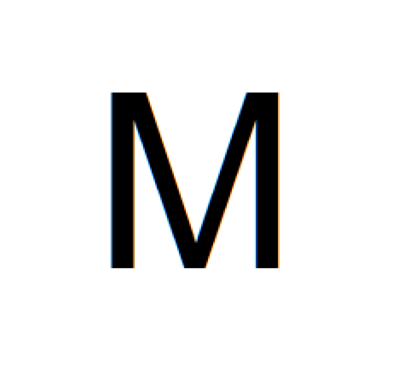

In [ ]:
# Upload the image file
uploaded = files.upload()

# Get the uploaded image file
uploaded_file = next(iter(uploaded))

# Load and preprocess the uploaded image
image = cv2.imread(uploaded_file)
resized_image = cv2.resize(image, (200, 240))
resized_image_copy = resized_image.copy()
resized_image_copy = np.array(resized_image_copy)
resized_image_copy = cv2.GaussianBlur(resized_image_copy, (7, 7), 0)
gray_image = cv2.cvtColor(resized_image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
final_image = cv2.resize(img_thresh, (28, 28))
final_image = np.reshape(final_image, (1, 28, 28, 1))

# Make the prediction using the loaded model
prediction = alphabets[np.argmax(model.predict(final_image))]

# Print the predicted label
print("Predicted label:", prediction)

# Display the uploaded image
plt.imshow(image)
plt.axis('off')
plt.show()
